<h2>Machine Learning for Predicting Winter Olympics:</h2>

<img src = "https://d5861f095856377e2601a9eb-grcrmmrywo7o.netdna-ssl.com/wp-content/uploads/2014/02/pyeongchang-2018-on-white.png" width=300>

In [2]:
%matplotlib nbagg 
# inline
import networkx as nx
import os as os
import glob
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
import math as mt
from IPython.display import Image 

<h1>Data Import:</h1>

In [3]:
#Read Population of counties
filename = "/Users/nimadarabi/Desktop/Population.csv"

dfs = []
dfs.append(pd.read_csv(filename,delimiter=";",index_col=False))

popul = pd.concat(dfs)

In [4]:
#Read Olympics Medals as dataframe
path = "/Users/nimadarabi/Pandas/Olympics/Winter/"

filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) & f.endswith('.csv')]
filenames = [s.strip('.csv') for s in filenames]

dfs = []
for filename in filenames:
    a = pd.read_csv(path+filename+'.csv',delimiter=";",names=["country", "code","gold","silver","bronze"])
    a["year"] = int(filename)
    dfs.append(a)

df = pd.concat(dfs)
df["host"] = df["code"].str.contains('\*')
df["code"] = df["code"].str.replace("\*","")


df["code"] = df["code"].str.replace("USR","RUS")
df["code"] = df["code"].str.replace("EUN","RUS")

In [5]:
# Adding scores based on models
Models = {"Gold First"    : np.array([100, 1, 0.01]),
          "Fibonacci"     : np.array([3, 2, 1]),
          "Exponential"   : np.array([4, 2, 1]),
          "London 1908"   : np.array([5, 3, 1]),
          "LOF"           : np.array([5, 3, 2]),
          "Topend" : np.array([6, 2, 1]),
          "Total" : np.array([1, 1, 1])
         }

for model in list(Models.keys()):
    df[model] = Models[model][0]*df["gold"] + Models[model][1]*df["silver"] + Models[model][2]*df["bronze"]

for model in list(Models.keys()):    
    df ["rank"+model] = df.groupby('year')[model].rank(ascending=False).map(lambda x: mt.ceil(x)).astype(int)

<IPython.core.display.Javascript object>


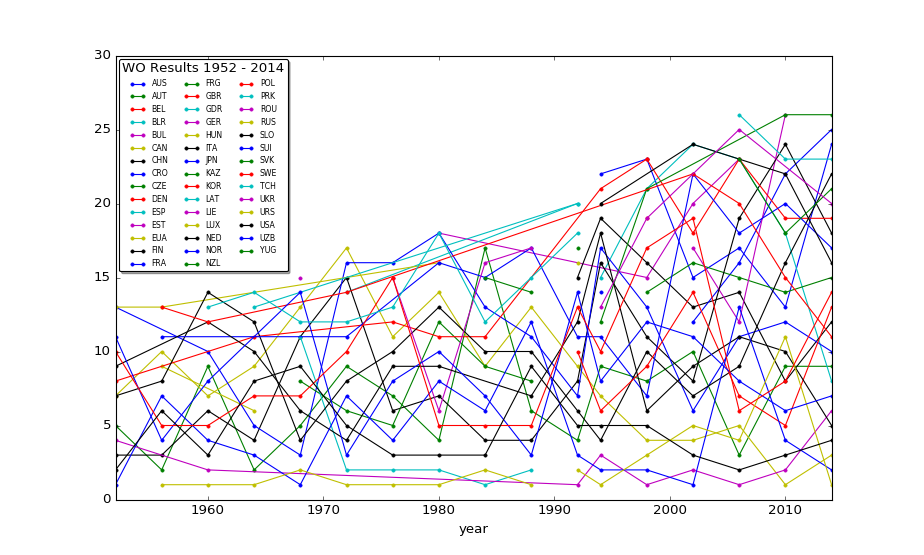

In [19]:
fig, ax = plt.subplots()
labels = []
for key, grp in df.groupby(['code']):
    ax = grp.plot(ax=ax, kind='line', x=['year'], y = ['rank' + 'Gold First'], marker = '.')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left', fontsize = 'xx-small', shadow=True, title="WO Results 1952 - 2014",fancybox=True, ncol=3)

<IPython.core.display.Javascript object>


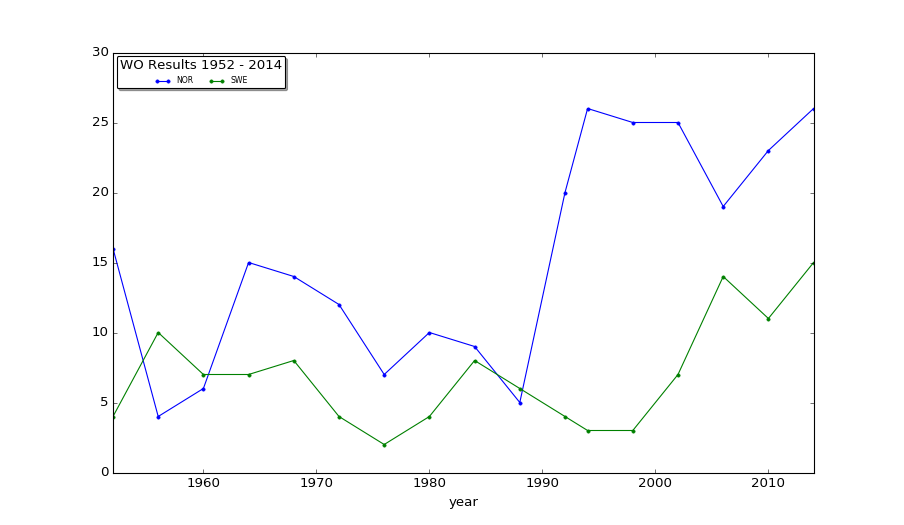

In [20]:
df2 = df[df['country'].isin(["Norway", "Sweden"])]

fig, ax = plt.subplots()
labels = []
for key, grp in df2.groupby(['code']):
    ax = grp.plot(ax=ax, kind='line', x=['year'], y = ['Total'], marker = '.')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left', fontsize = 'xx-small', shadow=True, title="WO Results 1952 - 2014",fancybox=True, ncol=3)

In [90]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
from plotly.graph_objs import Scatter, Figure, Layout

In [48]:
df [ df ["code"] == "USA"]

,country,code,gold,silver,bronze,year,host,Gold First,London 1908,LOF,Exponential,Fibonacci,Total,Topend,rank
1,United States,USA,4,6,1,1952,False,406.01,39,40,29,25,11,37,2
5,United States,USA,2,3,2,1956,False,203.02,21,23,16,14,7,20,6
2,United States,USA,3,4,3,1960,True,304.03,30,33,23,20,10,29,3
7,United States,USA,1,2,4,1964,False,102.04,15,19,12,11,7,14,8
8,United States,USA,1,5,1,1968,False,105.01,21,22,15,14,7,17,9
4,United States,USA,3,2,3,1972,False,302.03,24,27,19,16,8,25,5
2,United States,USA,3,3,4,1976,False,303.04,28,32,22,19,10,28,3
2,United States,USA,6,4,2,1980,True,604.02,44,46,34,28,12,46,3
2,United States,USA,4,4,0,1984,False,404.00,32,32,24,20,8,32,3
8,United States,USA,2,1,3,1988,False,201.03,16,19,13,11,6,17,9


In [50]:
df["year"].unique()

array([1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1994, 1998, 2002, 2006, 2010, 2014])

In [60]:
popul [popul ["Country"] == "Norway"]

,Country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
153,Norway,3265,3429,3582,3724,3876,4006,4083,4148,424,436,4492,4624,4891,5211


<IPython.core.display.Javascript object>


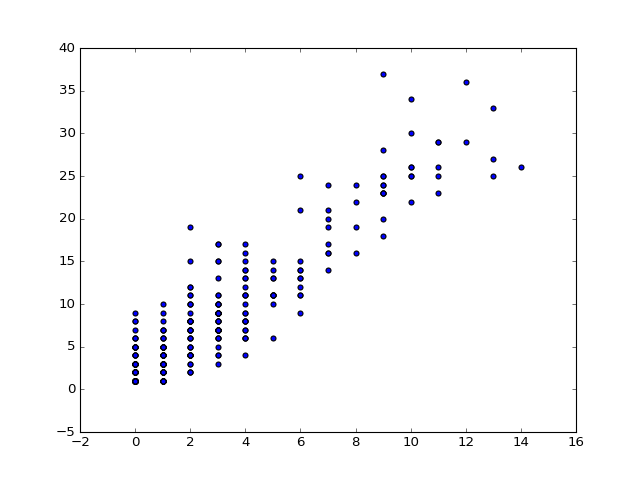

In [79]:
plt.scatter(df["gold"], df["Total"])

In [ ]:
plt.scatter(df["year"], df["Total"])

Conclusion:

"Yes, past success is a good predictor of future success in the Olympic Games, and the bigger, better-off countries are almost guaranteed to do well given the socioeconomic advantages they enjoy, but it should be remembered that a certain level of unpredictability remains in any sporting competition," the authors wrote. "The history of the Olympic Games is full of surprising performances by individual athletes, and we should expect to see more of them in Rio in August."

https://phys.org/news/2016-06-olympic-medals.html

In [ ]:
OutputRanking = {key: rank for rank, key in enumerate(sorted(OutputScore, key=OutputScore.get, reverse=True), 1)}
OutputRanking = sorted(OutputScore, key=OutputScore.get, reverse=True)



In [ ]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in xrange(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

In [ ]:
X

In [ ]:
y

## export NetworkX to html

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [ ]:
G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d
        
p=nx.single_source_shortest_path_length(G,ncenter)

In [ ]:
edge_trace = Scatter(
    x=[], 
    y=[], 
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[], 
    y=[], 
    text=[],
    mode='markers', 
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[], 
        size=10,         
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

In [ ]:
for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

In [ ]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False, 
                width=650,
                height=650,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

#import plotly as py

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

In [6]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file:///Users/nimadarabi/Pandas/Olympics/temp-plot.html'